# LINEAR REGRESSION

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

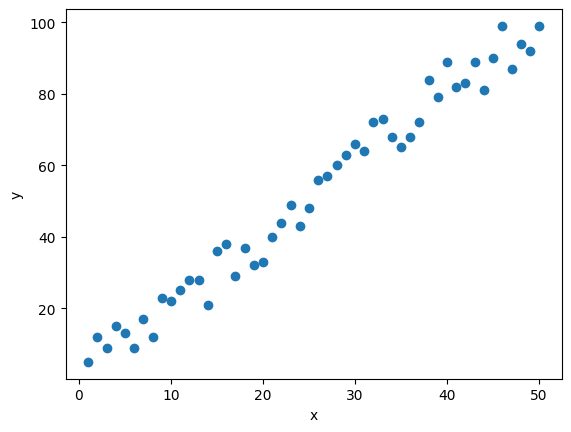

In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
y = 2*X + 1 + e
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [10]:
class Model(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()

        # define the layers here
        self.linear = nn.Linear(in_dim, out_dim)

    # connect the layer to each pther in this method
    def forward(self, x):
        out = self.linear(x)

        return out


In [13]:
# define the model
model = Model(1,1)

# define the loss function
criterion = nn.MSELoss()

# set the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

<div class="alert alert-info"><strong>Let's walk through the steps we're about to take:</strong><br>

1. Set a reasonably large number of passes<br>
<tt><font color=black>epochs = 50</font></tt><br>
2. Create a list to store loss values. This will let us view our progress afterward.<br>
<tt><font color=black>losses = []</font></tt><br>
<tt><font color=black>for i in range(epochs):</font></tt><br>
3. Bump "i" so that the printed report starts at 1<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;i+=1</font></tt><br>
4. Create a prediction set by running "X" through the current model parameters<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;y_pred = model.forward(X)</font></tt><br>
5. Calculate the loss<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss = criterion(y_pred, y)</font></tt><br>
6. Add the loss value to our tracking list<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;losses.append(loss)</font></tt><br>
7. Print the current line of results<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;print(f'epoch: {i:2} loss: {loss.item():10.8f}')</font></tt><br>
8. Gradients accumulate with every backprop. To prevent compounding we need to reset the stored gradient for each new epoch` = it means in the optimizer, make the gradients zero.`<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.zero_grad()</font></tt><br>
9. Now we can backprop `= it means we calculate the gradients of loss function wrt the weights and biases`<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;loss.backward()</font></tt><br>
10. Finally, we can update the hyperparameters of our model `= it means that we update the weights of the model`<br>
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;optimizer.step()</font></tt>
</div>

In [14]:
epochs = 50
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 5759.10205078  weight: -0.56887245  bias: -0.03454399
epoch:  2  loss: 2983.87500000  weight: 3.86968350  bias: 0.09853759
epoch:  3  loss: 1551.12353516  weight: 0.68045115  bias: 0.00498665
epoch:  4  loss: 811.44390869  weight: 2.97190213  bias: 0.07427367
epoch:  5  loss: 429.57305908  weight: 1.32539833  bias: 0.02655811
epoch:  6  loss: 232.42646790  weight: 2.50837517  bias: 0.06290969
epoch:  7  loss: 130.64584351  weight: 1.65832651  bias: 0.03885673
epoch:  8  loss: 78.09941101  weight: 2.26903820  bias: 0.05820436
epoch:  9  loss: 50.97087097  weight: 1.83017123  bias: 0.04636700
epoch: 10  loss: 36.96467209  weight: 2.14544249  bias: 0.05693554
epoch: 11  loss: 29.73308182  weight: 1.91885400  bias: 0.05140410
epoch: 12  loss: 25.99896240  weight: 2.08159995  bias: 0.05743973
epoch: 13  loss: 24.07049561  weight: 1.96460342  bias: 0.05516326
epoch: 14  loss: 23.07420921  weight: 2.04860616  bias: 0.05885816
epoch: 15  loss: 22.55915833  weight: 1.98818755  

# CLASSIFICATION